In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np

In [2]:
INITIAL_PATH = Path.cwd().parent
DATA_PATH = INITIAL_PATH / 'data'
PREPROCESSED_DATA_PATH = DATA_PATH / 'preprocessed'
RESULTS_DATA_PATH = INITIAL_PATH / 'results'
SPLITTED_DATA_PATH = PREPROCESSED_DATA_PATH / 'splitted'
VISUALIZATION_DATA_PATH = INITIAL_PATH / 'visualizations'
AGREGGATED_DATA_PATH = VISUALIZATION_DATA_PATH / 'aggregated'

In [3]:
RESULTS_KLEKOTA_ROTH = RESULTS_DATA_PATH / 'KlekFP.csv'
RESULTS_MACCS = RESULTS_DATA_PATH / 'MACCSFP.csv'
RESULTS_EXT = RESULTS_DATA_PATH / 'ExtFP.csv'
RESULTS_KLEKOTA_ROTH__MACCS_DATA = RESULTS_DATA_PATH / 'KlekFP-MACCSFP.csv'
RESULTS_KLEKOTA_ROTH__EXT_DATA = RESULTS_DATA_PATH / 'KlekFP-ExtFP.csv'
RESULTS_MACCS__EXT_DATA = RESULTS_DATA_PATH / 'MACCSFP-ExtFP.csv'
RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA = RESULTS_DATA_PATH / 'KlekFP-MACCSFP-ExtFP.csv'

RESULTS_DEEP_NEURAL_NETWORKS = RESULTS_DATA_PATH / 'deep_neural_networks' / 'results.csv'

In [4]:
RESULTS_KLEKOTA_ROTH_X = RESULTS_DATA_PATH / '{}/KlekFP[{}].csv'
RESULTS_MACCS_X = RESULTS_DATA_PATH / '{}/MACCSFP[{}].csv'
RESULTS_EXT_X = RESULTS_DATA_PATH / '{}/ExtFP[{}].csv'
RESULTS_KLEKOTA_ROTH__MACCS_DATA_X = RESULTS_DATA_PATH / '{}/KlekFP-MACCSFP[{}].csv'
RESULTS_KLEKOTA_ROTH__EXT_DATA_X = RESULTS_DATA_PATH / '{}/KlekFP-ExtFP[{}].csv'
RESULTS_MACCS__EXT_DATA_X = RESULTS_DATA_PATH / '{}/MACCSFP-ExtFP[{}].csv'
RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA_X = RESULTS_DATA_PATH / '{}/KlekFP-MACCSFP-ExtFP[{}].csv'

In [5]:
VISUALIZATION_KLEKOTA_ROTH = VISUALIZATION_DATA_PATH / 'KlekFP.png'
VISUALIZATION_MACCS = VISUALIZATION_DATA_PATH / 'MACCSFP.png'
VISUALIZATION_EXT = VISUALIZATION_DATA_PATH / 'ExtFP.png'
VISUALIZATION_KLEKOTA_ROTH__MACCS_DATA = VISUALIZATION_DATA_PATH / 'KlekFP-MACCSFP.png'
VISUALIZATION_KLEKOTA_ROTH__EXT_DATA = VISUALIZATION_DATA_PATH / 'KlekFP-ExtFP.png'
VISUALIZATION_MACCS__EXT_DATA = VISUALIZATION_DATA_PATH / 'MACCSFP-ExtFP.png'
VISUALIZATION_KLEKOTA_ROTH__MACCS__EXT_DATA = VISUALIZATION_DATA_PATH / 'KlekFP-MACCSFP-ExtFP.png'

In [6]:
VISUALIZATION_KLEKOTA_ROTH_X = VISUALIZATION_DATA_PATH / '{}/KlekFP[{}].png'
VISUALIZATION_MACCS_X = VISUALIZATION_DATA_PATH / '{}/MACCSFP[{}].png'
VISUALIZATION_EXT_X = VISUALIZATION_DATA_PATH / '{}/ExtFP[{}].png'
VISUALIZATION_KLEKOTA_ROTH__MACCS_DATA_X = VISUALIZATION_DATA_PATH / '{}/KlekFP-MACCSFP[{}].png'
VISUALIZATION_KLEKOTA_ROTH__EXT_DATA_X = VISUALIZATION_DATA_PATH / '{}/KlekFP-ExtFP[{}].png'
VISUALIZATION_MACCS__EXT_DATA_X = VISUALIZATION_DATA_PATH / '{}/MACCSFP-ExtFP[{}].png'
VISUALIZATION_KLEKOTA_ROTH__MACCS__EXT_DATA_X = VISUALIZATION_DATA_PATH / '{}/KlekFP-MACCSFP-ExtFP[{}].png'

In [7]:
VISUALIZATION_SINGLE_FULL_FINGERPRINTS = AGREGGATED_DATA_PATH / 'single_full.png'
VISUALIZATION_MIXED_FULL_FINGERPRINTS = AGREGGATED_DATA_PATH / 'mixed_full.png'
VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_X = AGREGGATED_DATA_PATH / 'single_partial[{}].png'
VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_X = AGREGGATED_DATA_PATH / 'mixed_partial[{}].png'

VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_KLEKFP = AGREGGATED_DATA_PATH / 'single_partial_KlekFP.png'
VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_MACCSFP = AGREGGATED_DATA_PATH / 'single_partial_MACCSFP.png'
VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_EXTFP = AGREGGATED_DATA_PATH / 'single_partial_ExtFP.png'

VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_KLEKOTA_ROTH__MACCS = AGREGGATED_DATA_PATH / 'mixed_partial_KlekFP-MACCSFP.png'
VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_KLEKOTA_ROTH__EXT = AGREGGATED_DATA_PATH / 'mixed_partial_KlekFP-ExtFP.png'
VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_MACCS__EXT = AGREGGATED_DATA_PATH / 'mixed_partial_MACCSFP-ExtFP.png'
VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_KLEKOTA_ROTH__MACCS__EXT = AGREGGATED_DATA_PATH / 'mixed_partial_KlekFP-MACCSFP-ExtFP.png'


VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS = AGREGGATED_DATA_PATH / 'single_partial_comparision.png'
VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS = AGREGGATED_DATA_PATH / 'mixed_partial_comparision.png'

VISUALIZATION_DEEP_NEURAL_NETWORKS = VISUALIZATION_DATA_PATH / 'deep_neural_networks.png'
VISUALIZATION_DEEP_NEURAL_NETWORKS_AGGREGATED = VISUALIZATION_DATA_PATH / 'deep_neural_networks_aggregated.png'

In [32]:
class DataVisualizer():
    
    def __init__(self):
        self.fingerpint_to_full_name_mapping = {
            "ExtFP": "Extended-Connectivity fingerprint",
            "KlekFP": "Klekhota-Roth fingerprint",
            "MACCSFP": "Molecular Access System fingerprint",
            "KlekFP-MACCSFP": "mixed Klekhota-Roth and Molecular Access System fingerprints",
            "KlekFP-ExtFP": "mixed Klekhota-Roth and Extended-Connectivity fingerprints",
            "MACCSFP-ExtFP": "mixed Molecular Access System and Extended-Connectivity fingerprints",
            "KlekFP-MACCSFP-ExtFP": "mixed Klekhota-Roth, Molecular Access System and Extended-Connectivity fingerprints"
        }
        self.estimator_type_mapping = {
            'LogisticRegression': ['C', 'penalty', 'max_iter', 'solver'],
            'RidgeClassifier': ['alpha'],
            'SGDClassifier': ['C', 'penalty', 'max_iter', 'solver'],
            'SVC': ['C', 'kernel'],
            'ExtraTreesClassifier': ['n_estimators', 'criterion', 'max_features'],
            'RandomForestClassifier': ['n_estimators'],
            'AdaBoostClassifier': ['n_estimators'],
            'GradientBoostingClassifier': ['n_estimators', 'learning_rate']
        }
    
    def apply(self, input_filepath, output_filepath, number_of_feautures=None):
        filename = str(input_filepath).split('\\')[-1]
        data_type = filename.split('.')[0]
        data_type = data_type.split('[')[0]

        df = pd.read_csv(input_filepath)
        df = df.sort_values(by=['mean_score'], ascending=False)
        df = df[:5]
        df['mean_score'] = df['mean_score'].apply(lambda x: round(x, 4))
        df = df.apply(self.__map_row, axis=1)
        
        fig = plt.figure(figsize = (15, 7), facecolor='white')
        plt.bar(df['estimator'], df['mean_score'], color ='maroon', width = 0.4)
        
        for i in range(len(df)):
            plt.text(i, df['mean_score'][i], df['mean_score'][i], ha = 'center', bbox = dict(facecolor = 'red', alpha = 0.8))

        plt.ylim([0.74, 0.8])
        
        title = f'Best accuracy for {self.fingerpint_to_full_name_mapping[data_type]}'
        title_postfix = '' if not number_of_feautures else f' with number of feautures = {number_of_feautures}'
        plt.title(title + title_postfix)
    
        plt.ylabel('Accurracy')
        plt.savefig(output_filepath)
        
        plt.show()
    
    def apply_for_multiple_files(self, input_filepaths, output_filepath, plot_title, plot_by = 'data_type'):
        filename = str(input_filepaths[0]).split('\\')[-1]
        data_type = filename.split('.')[0]
        
        number_of_feautures = None
        
        if '[' in data_type:
            splitted_data_type = data_type.split('[')
            
            data_type = splitted_data_type[0]
            number_of_feautures = splitted_data_type[1][:-1]
        
        try:
            df = pd.read_csv(input_filepaths[0])
        except:
            print(f'Ignoring {input_filepaths[0]} because the file does not exists')
            return
        df = df.sort_values(by=['mean_score'], ascending=False)
        df['data_type'] = data_type
        df['number_of_feautures'] = number_of_feautures
        df = df[['mean_score', 'data_type', 'number_of_feautures']]
        df = df[:1]
        
        for input_filepath in input_filepaths[1:]:
            filename = str(input_filepath).split('\\')[-1]
            data_type = filename.split('.')[0]
            
            if '[' in data_type:
                splitted_data_type = data_type.split('[')
            
                data_type = splitted_data_type[0]
                number_of_feautures = splitted_data_type[1][:-1]
        
            try:
                df_temp = pd.read_csv(input_filepath)
            except:
                print(f'Ignoring {input_filepath} because the file does not exists')
                continue
                
            df_temp = df_temp.sort_values(by=['mean_score'], ascending=False)
            df_temp['data_type'] = data_type
            df_temp['number_of_feautures'] = number_of_feautures
            df_temp = df_temp[['mean_score', 'data_type', 'number_of_feautures']]
            df_temp = df_temp[:1]
            
            df = pd.concat([df, df_temp], ignore_index = True, axis = 0)
        
        df = df.sort_values(by=['mean_score'], ascending=False)
        df['mean_score'] = df['mean_score'].apply(lambda x: round(x, 4))
        df = df.reset_index(drop=True)
                
        fig = plt.figure(figsize = (15, 7), facecolor='white')

        plt.bar(df[plot_by], df['mean_score'], color ='maroon', width = 0.4)
        
        for i in range(len(df)):
            plt.text(i, df['mean_score'][i], df['mean_score'][i], ha = 'center', bbox = dict(facecolor = 'red', alpha = 0.8))

        plt.ylim([0.74, 0.8])
        
        title = f'Best accuracy for {plot_title}'
        plt.title(title)
    
        plt.ylabel('Accurracy')
        plt.savefig(output_filepath)
        
        plt.show()
    
    def apply_for_multiple_bar_plots(self, input_filepaths, output_filepath, plot_title, plot_by = 'data_type'):
        filename = str(input_filepaths[0]).split('\\')[-1]
        data_type = filename.split('.')[0]
        
        number_of_feautures = None
        
        if '[' in data_type:
            splitted_data_type = data_type.split('[')
            
            data_type = splitted_data_type[0]
            number_of_feautures = int(splitted_data_type[1][:-1])
        
        try:
            df = pd.read_csv(input_filepaths[0])
        except:
            print(f'Ignoring {input_filepaths[0]} because the file does not exists')
            return
        df = df.sort_values(by=['mean_score'], ascending=False)
        df['data_type'] = data_type
        df['number_of_feautures'] = number_of_feautures
        df = df[['mean_score', 'data_type', 'number_of_feautures']]
        df = df[:1]
        
        for input_filepath in input_filepaths[1:]:
            filename = str(input_filepath).split('\\')[-1]
            data_type = filename.split('.')[0]
            
            if '[' in data_type:
                splitted_data_type = data_type.split('[')
            
                data_type = splitted_data_type[0]
                number_of_feautures = int(splitted_data_type[1][:-1])
        
            try:
                df_temp = pd.read_csv(input_filepath)
            except:
                print(f'Ignoring {input_filepath} because the file does not exists')
                continue
                
            df_temp = df_temp.sort_values(by=['mean_score'], ascending=False)
            df_temp['data_type'] = data_type
            df_temp['number_of_feautures'] = number_of_feautures
            df_temp = df_temp[['mean_score', 'data_type', 'number_of_feautures']]
            df_temp = df_temp[:1]
            
            df = pd.concat([df, df_temp], ignore_index = True, axis = 0)
        
        df = df.sort_values(by=['number_of_feautures'], ascending=True)
        df['mean_score'] = df['mean_score'].apply(lambda x: round(x, 4))
        df = df.reset_index(drop=True)
                
        unique_data_types = df['data_type'].unique()
        dfs_with_unique_data_types = []
        for unique_data_type in unique_data_types:
            dfs_with_unique_data_types.append(df[df['data_type'] == unique_data_type])
        
        unique_number_of_feautures = df['number_of_feautures'].unique()
        
        width = 0.2
        fig = plt.figure(figsize = (15, 7), facecolor='white')
        ax = fig.add_subplot(111)
        
        bars = []
        for index, df_with_unique_data_type in enumerate(dfs_with_unique_data_types):
            ind = np.arange(len(df_with_unique_data_type))
            bar = ax.bar(ind + width * index, df_with_unique_data_type['mean_score'], width)
            bars.append(bar)
        
        ax.set_ylabel('Accurracy')
        ax.set_xticks(np.arange(len(unique_number_of_feautures)) + width / 2 + width * ((len(unique_data_types) - 2) / 2))
        ax.set_xticklabels(unique_number_of_feautures)
        ax.legend(unique_data_types)

        for bar in bars:
            for single_bar in bar:
                h = single_bar.get_height()
                ax.text(single_bar.get_x() + single_bar.get_width() / 2., single_bar.get_height(), str(single_bar.get_height()), ha='center', bbox = dict(facecolor = 'red', alpha = 0.8))
                
        plt.ylim([0.74, 0.8])
        
        title = f'Best accuracy for {plot_title}'
        plt.title(title)
    
        plt.savefig(output_filepath)
        
        plt.show()
    
    def apply_for_deep_neural_networks(self, input_filepath, output_filepath, output_filepath_aggregated):
        df = pd.read_csv(input_filepath)
        results = {}
        for result in df:
            accurracy = round(df[result][0], 4)
            data_type = result.split('cardiotoxicity_hERG_')[1]
            results[data_type] = accurracy
            
        results_sorted = [{k: v} for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)]
        results_top_5 = results_sorted[:5]
        
        x = [list(x.keys())[0] for x in results_top_5]
        y = [list(x.values())[0] for x in results_top_5]
        fig = plt.figure(figsize = (15, 7), facecolor='white')

        plt.bar(x, y, color ='maroon', width = 0.4)
        
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center', bbox = dict(facecolor = 'red', alpha = 0.8))

        plt.ylim([0.74, 0.8])
        
        plt.title('Best accuracy for deep neural network models')
    
        plt.ylabel('Accurracy')
        plt.savefig(output_filepath)
        
        plt.show()
        
        
        results_aggregated = {k.split('_Model')[0]: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=False)}
        results_aggregated = {k: v for k, v in sorted(results_aggregated.items(), key=lambda item: item[1], reverse=True)}
        x = list(results_aggregated.keys())
        y = list(results_aggregated.values())
        
        fig = plt.figure(figsize = (15, 7), facecolor='white')
        plt.bar(x, y, color ='maroon', width = 0.4)
        
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center', bbox = dict(facecolor = 'red', alpha = 0.8))

        plt.ylim([0.74, 0.8])
        
        plt.title('Best accuracy for aggregated deep neural network models')
    
        plt.ylabel('Accurracy')
        plt.savefig(output_filepath_aggregated)
        
        plt.show()

    
    def __map_row(self, row):
        mapped_hyperparameters = [f'{name}={value}' for name, value in row[self.estimator_type_mapping[row['estimator']]].iteritems()]
        row['estimator'] = row['estimator'] + '\n' + '\n'.join(mapped_hyperparameters)
        return row

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\500\MACCSFP[500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1000\MACCSFP[1000].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP[2000].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\ExtFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\ExtFP[2000].csv because the file does not exists


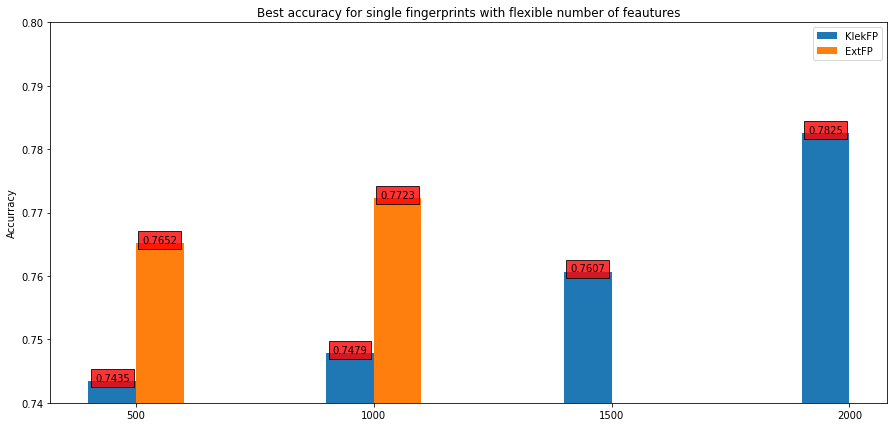

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP-ExtFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP-ExtFP[2000].csv because the file does not exists


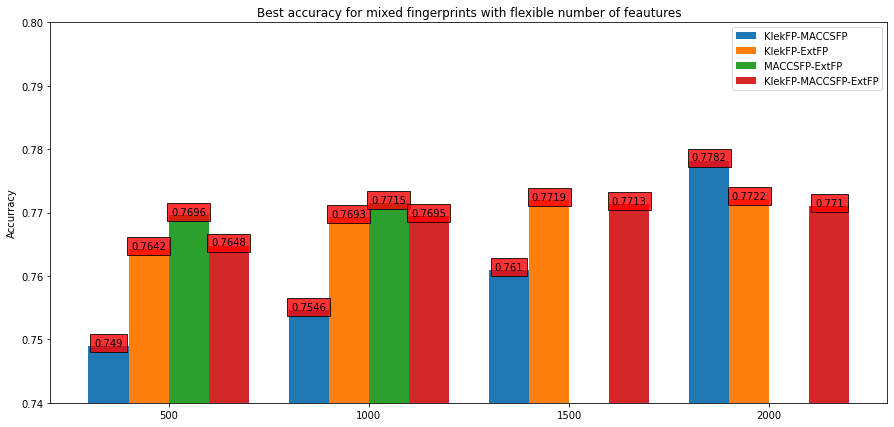

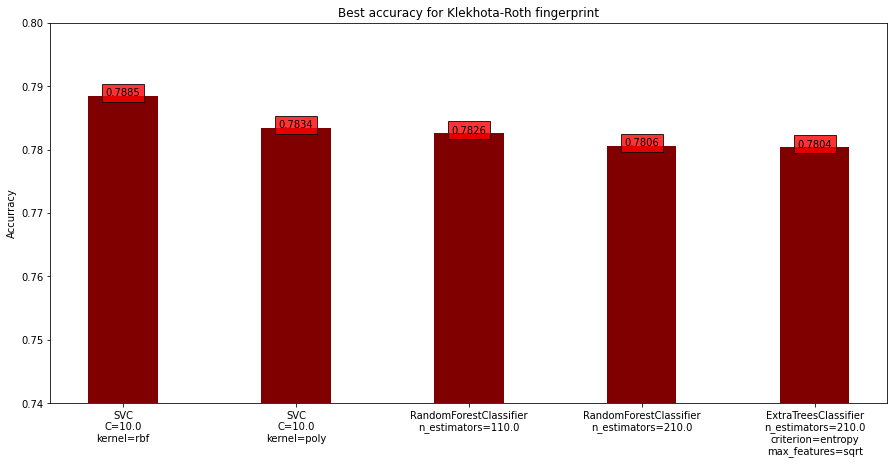

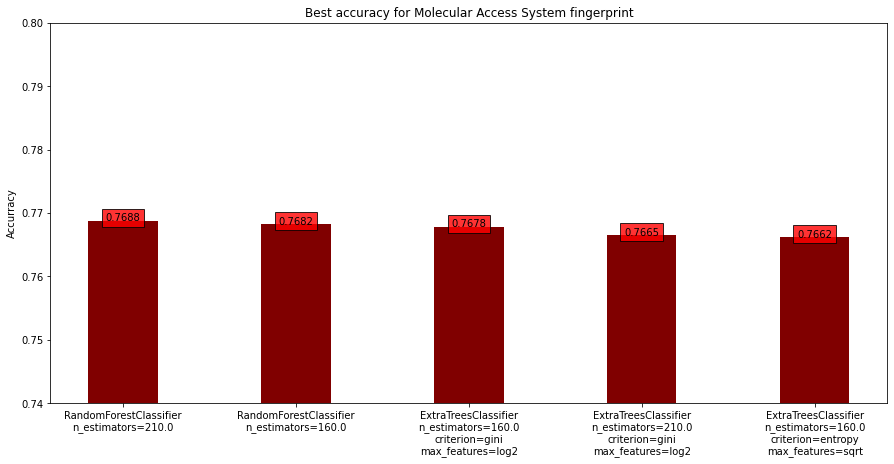

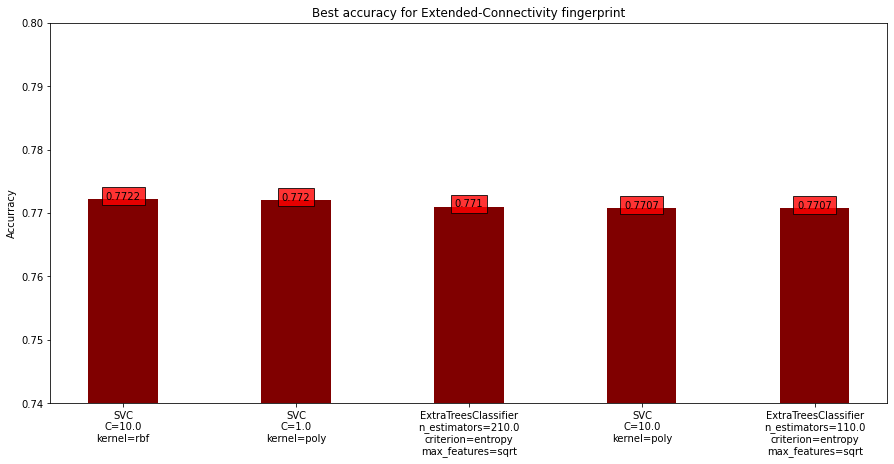

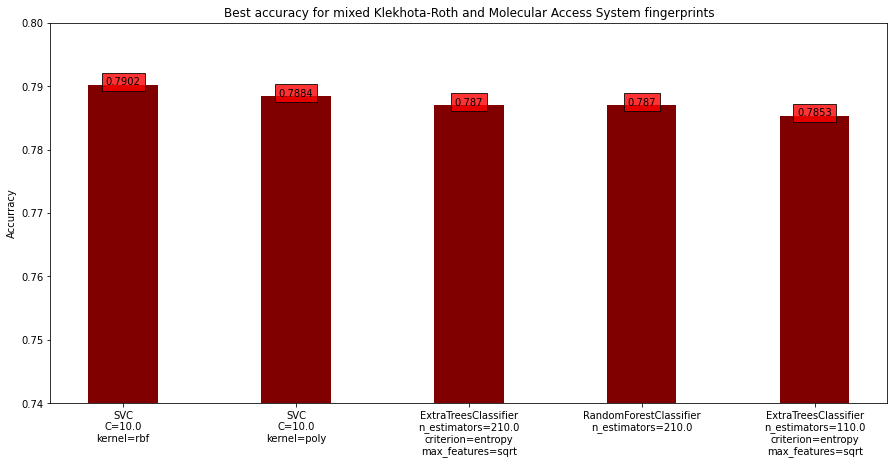

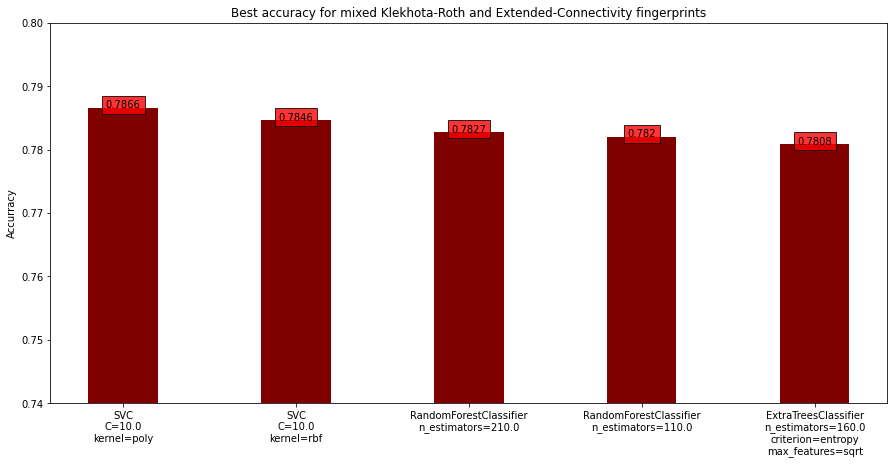

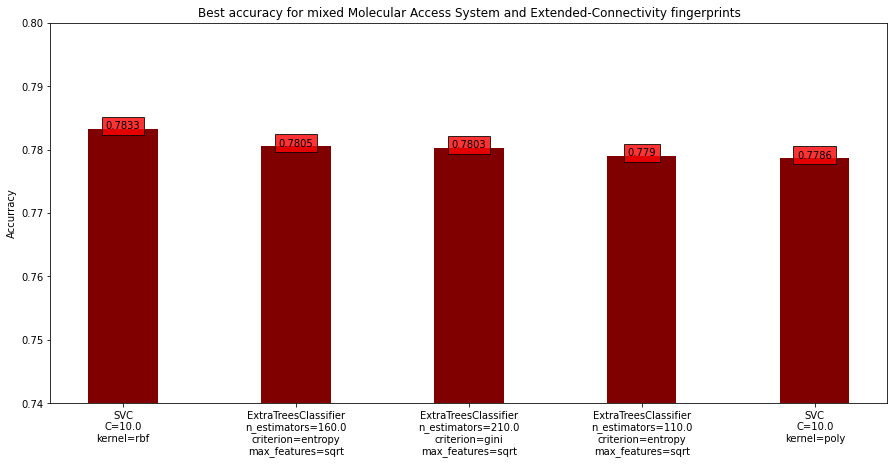

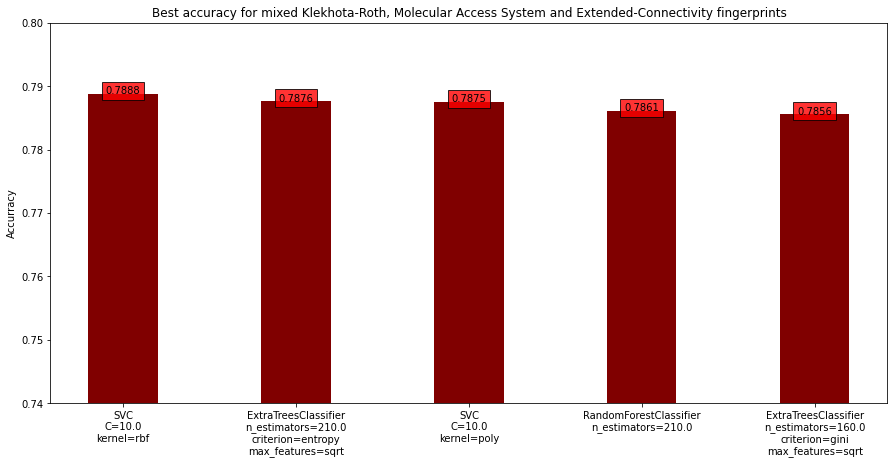

In [9]:
data_to_process = [
    (RESULTS_KLEKOTA_ROTH, VISUALIZATION_KLEKOTA_ROTH), 
    (RESULTS_MACCS, VISUALIZATION_MACCS), 
    (RESULTS_EXT, VISUALIZATION_EXT),
    
    (RESULTS_KLEKOTA_ROTH__MACCS_DATA, VISUALIZATION_KLEKOTA_ROTH__MACCS_DATA),
    (RESULTS_KLEKOTA_ROTH__EXT_DATA, VISUALIZATION_KLEKOTA_ROTH__EXT_DATA),
    (RESULTS_MACCS__EXT_DATA, VISUALIZATION_MACCS__EXT_DATA),
    (RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA, VISUALIZATION_KLEKOTA_ROTH__MACCS__EXT_DATA)
]

data_visualizer = DataVisualizer()

for data in data_to_process:
    data_visualizer.apply(data[0], data[1])

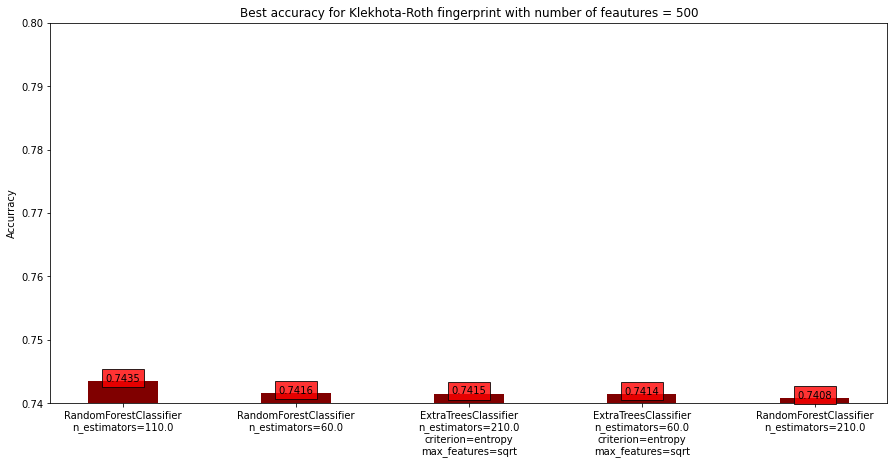

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\500\MACCSFP[500].csv because the file does not exists


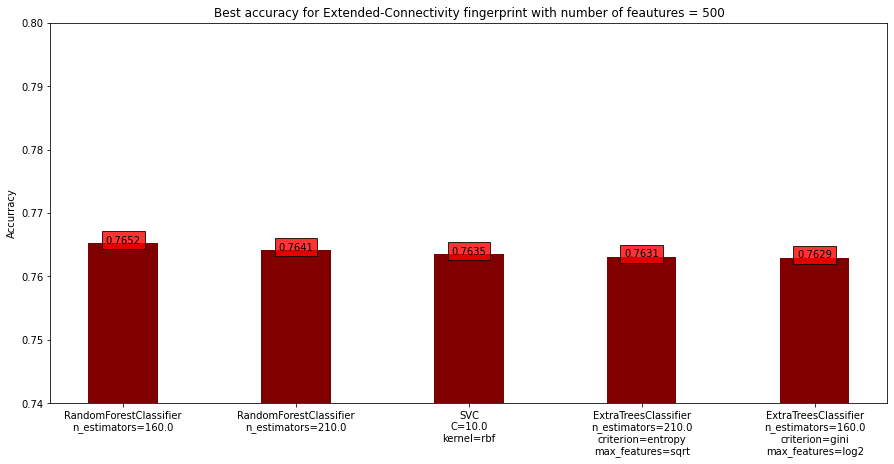

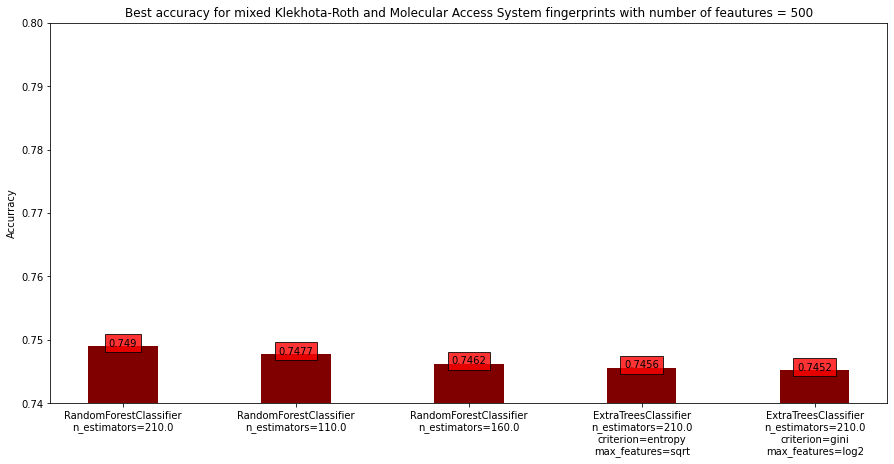

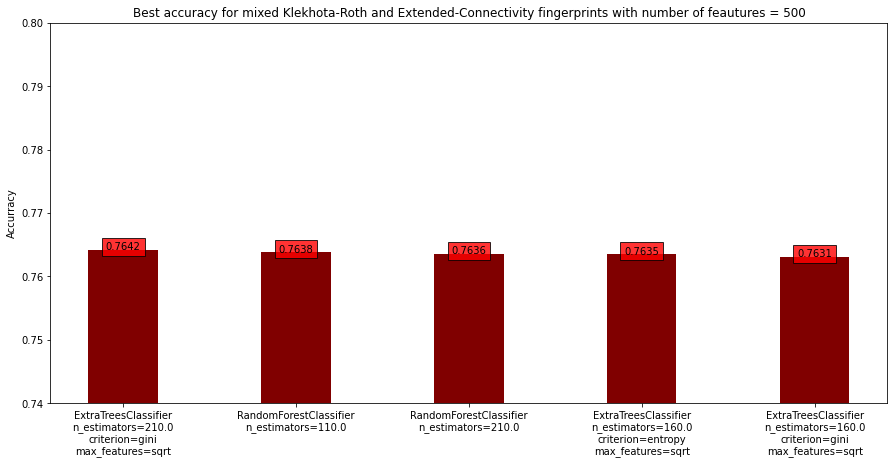

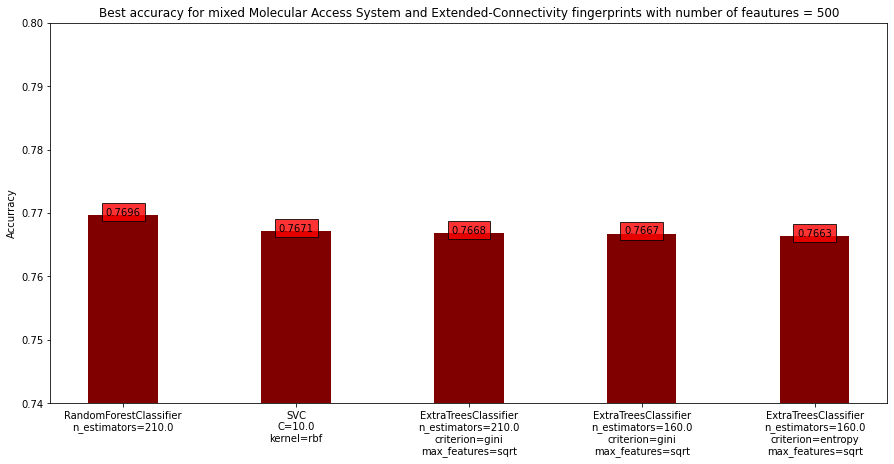

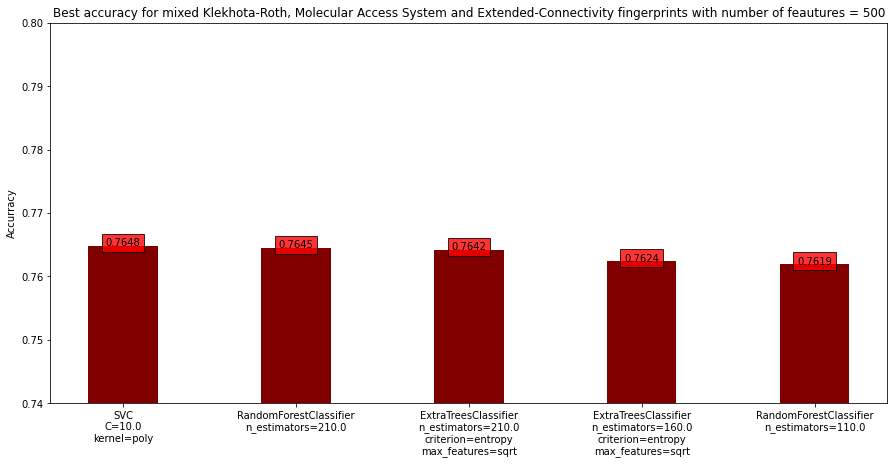

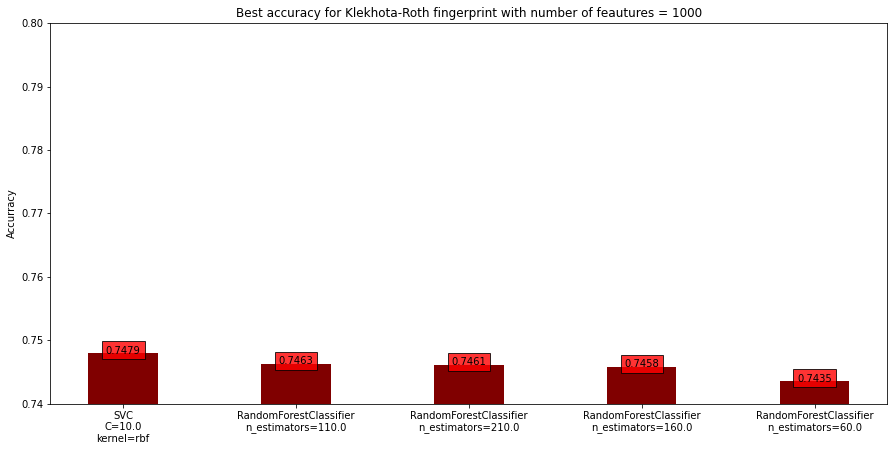

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1000\MACCSFP[1000].csv because the file does not exists


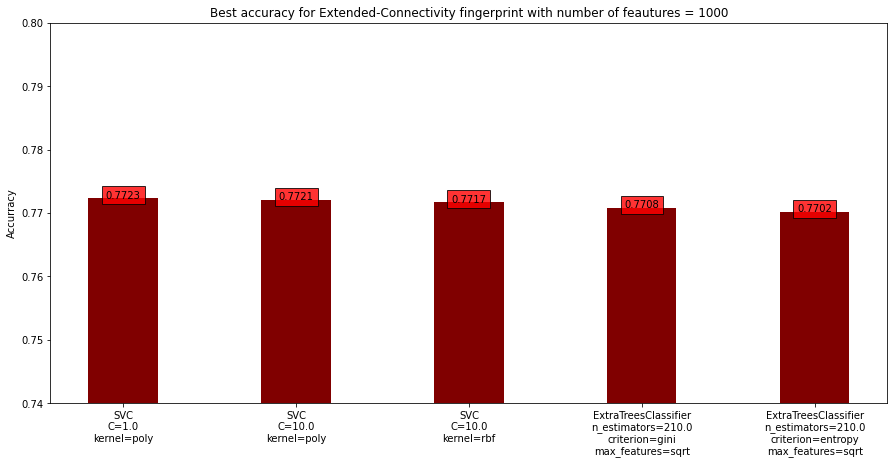

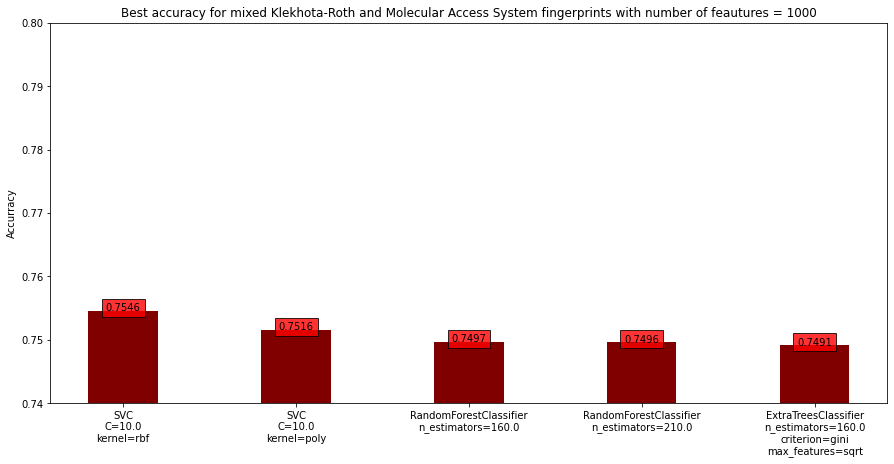

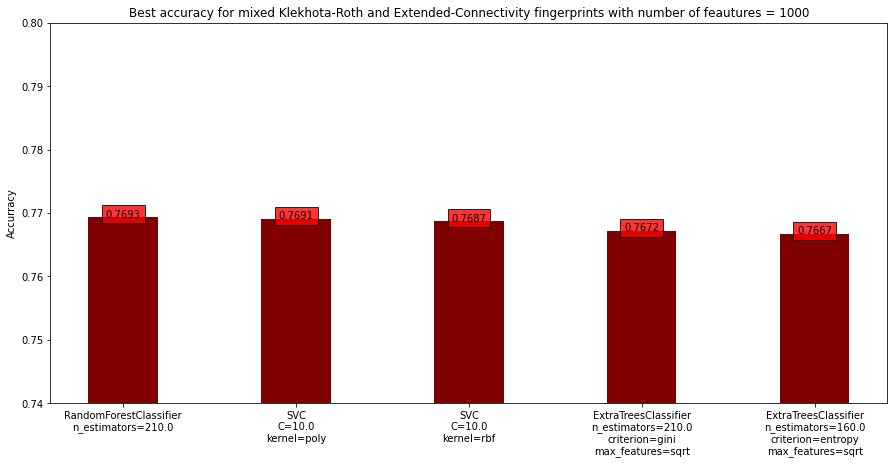

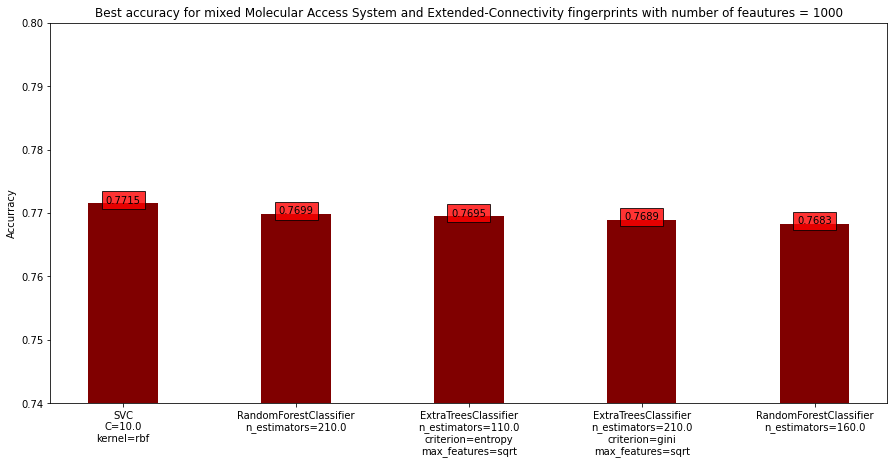

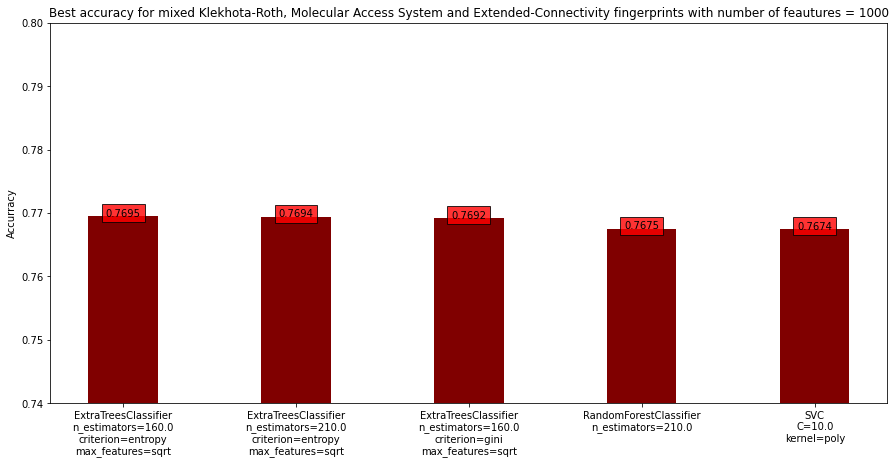

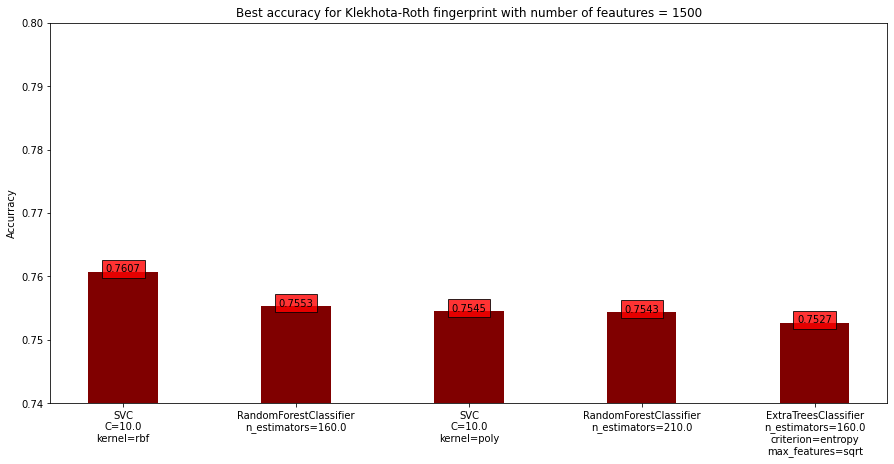

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\ExtFP[1500].csv because the file does not exists


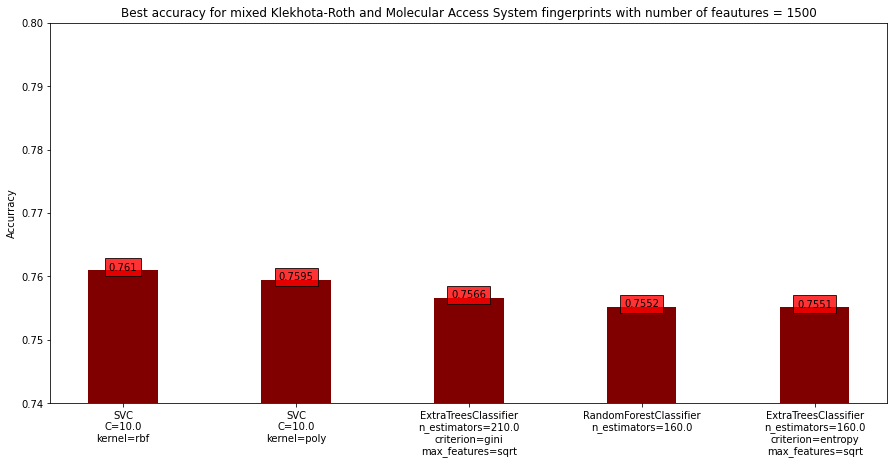

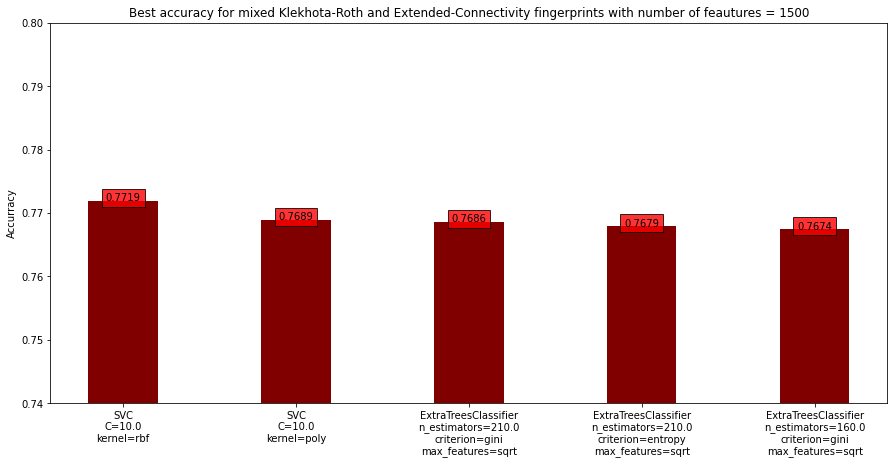

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP-ExtFP[1500].csv because the file does not exists


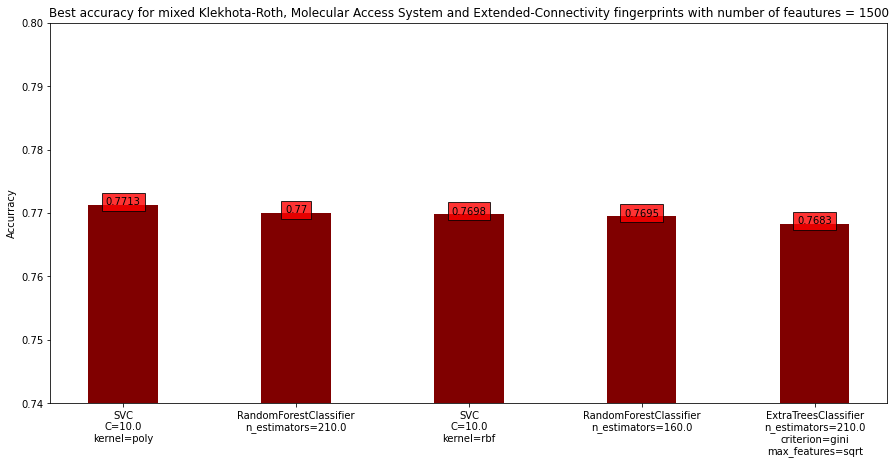

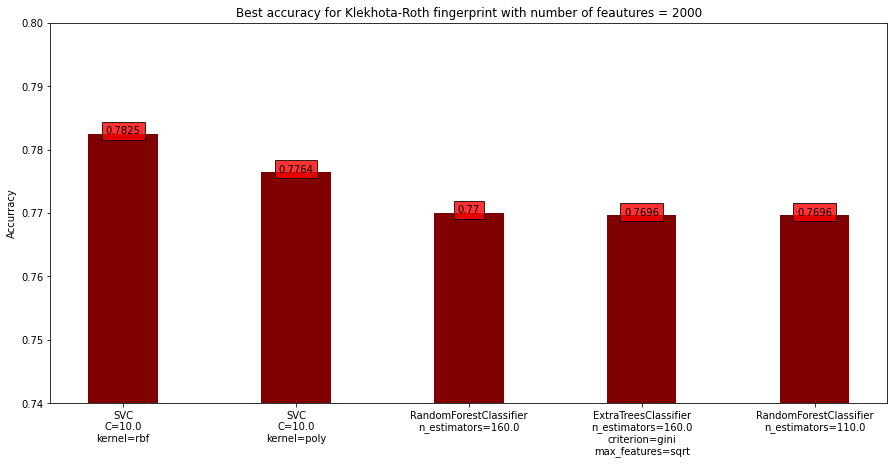

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP[2000].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\ExtFP[2000].csv because the file does not exists


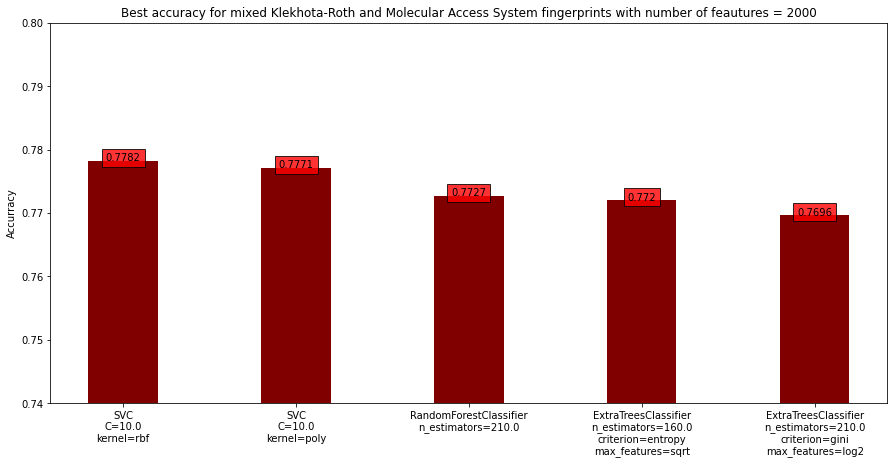

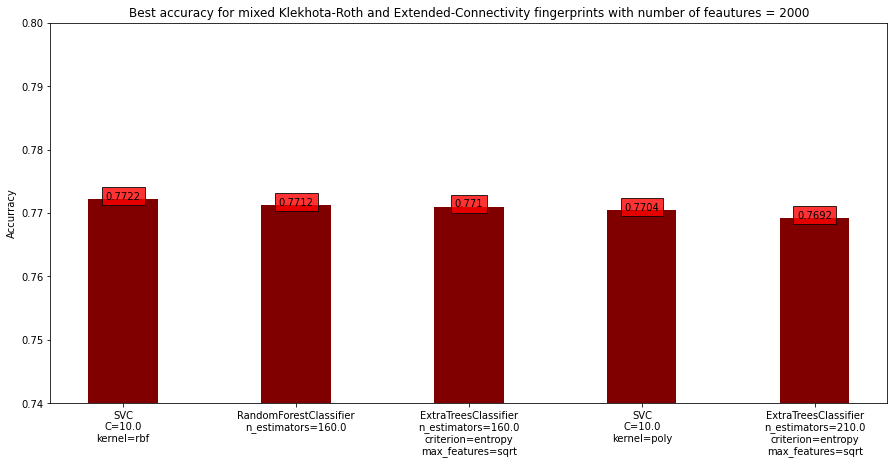

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP-ExtFP[2000].csv because the file does not exists


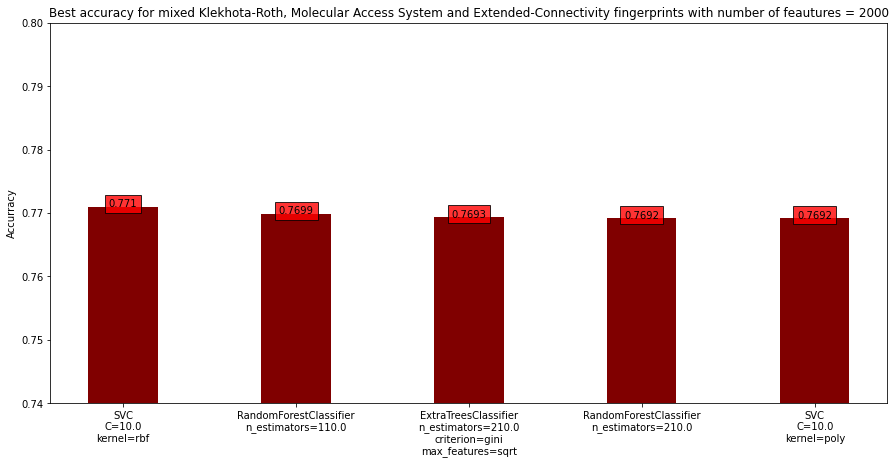

In [10]:
data_to_process = [
    (RESULTS_KLEKOTA_ROTH_X, VISUALIZATION_KLEKOTA_ROTH_X), 
    (RESULTS_MACCS_X, VISUALIZATION_MACCS_X), 
    (RESULTS_EXT_X, VISUALIZATION_EXT_X),
    
    (RESULTS_KLEKOTA_ROTH__MACCS_DATA_X, VISUALIZATION_KLEKOTA_ROTH__MACCS_DATA_X),
    (RESULTS_KLEKOTA_ROTH__EXT_DATA_X, VISUALIZATION_KLEKOTA_ROTH__EXT_DATA_X),
    (RESULTS_MACCS__EXT_DATA_X, VISUALIZATION_MACCS__EXT_DATA_X),
    (RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA_X, VISUALIZATION_KLEKOTA_ROTH__MACCS__EXT_DATA_X)
]

data_visualizer = DataVisualizer()

for x in range(500, 2500, 500):
    for data in data_to_process:
        input_path = Path(str(data[0]).format(x, x))
        output_path = Path(str(data[1]).format(x, x))
        try:
            data_visualizer.apply(input_path, output_path, x)
        except:
            print(f'Ignoring {input_path} because the file does not exists')

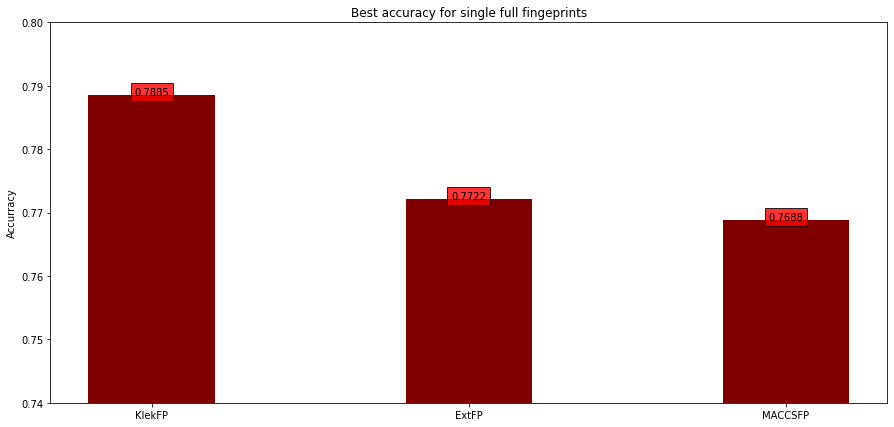

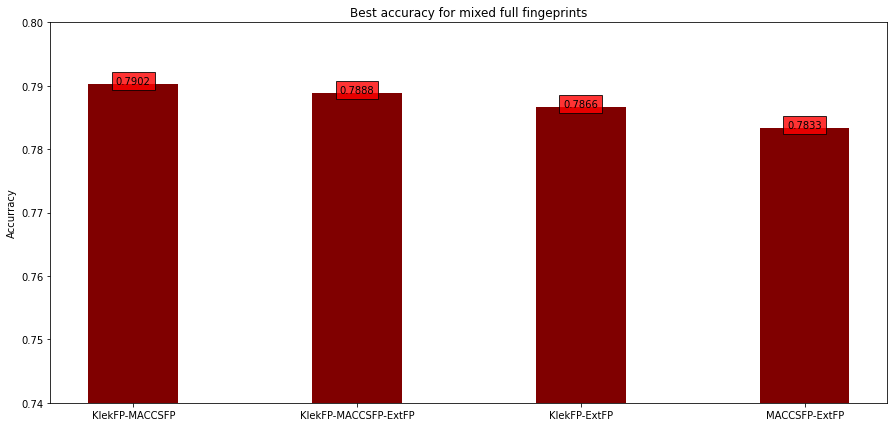

In [11]:
data_to_process = [
    ([RESULTS_KLEKOTA_ROTH, RESULTS_MACCS, RESULTS_EXT], VISUALIZATION_SINGLE_FULL_FINGERPRINTS, "single full fingeprints"), 
    ([RESULTS_KLEKOTA_ROTH__MACCS_DATA, RESULTS_KLEKOTA_ROTH__EXT_DATA, RESULTS_MACCS__EXT_DATA, RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA], VISUALIZATION_MIXED_FULL_FINGERPRINTS, "mixed full fingeprints")
]

data_visualizer = DataVisualizer()

for data in data_to_process:
    data_visualizer.apply_for_multiple_files(data[0], data[1], data[2])

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\500\MACCSFP[500].csv because the file does not exists


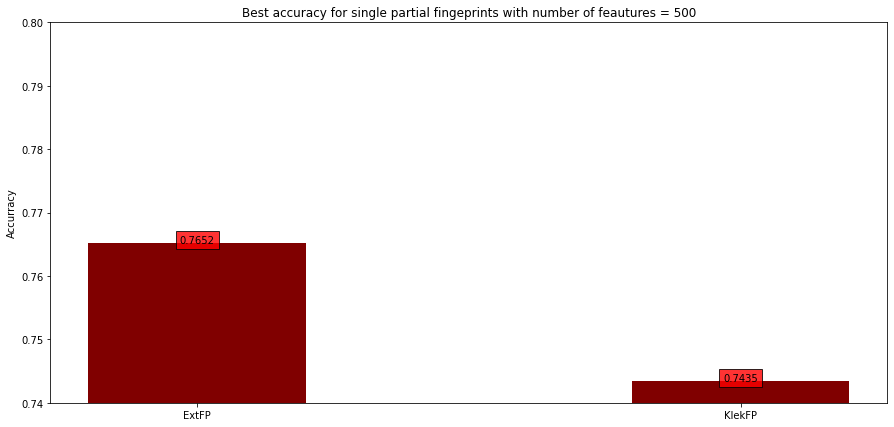

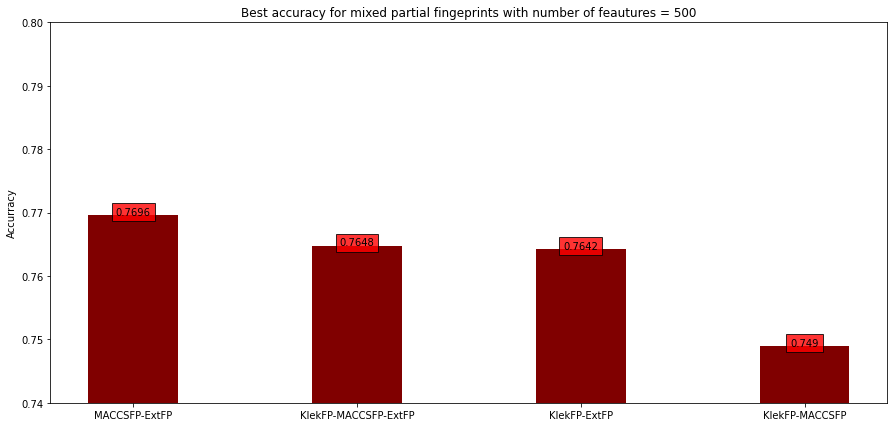

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1000\MACCSFP[1000].csv because the file does not exists


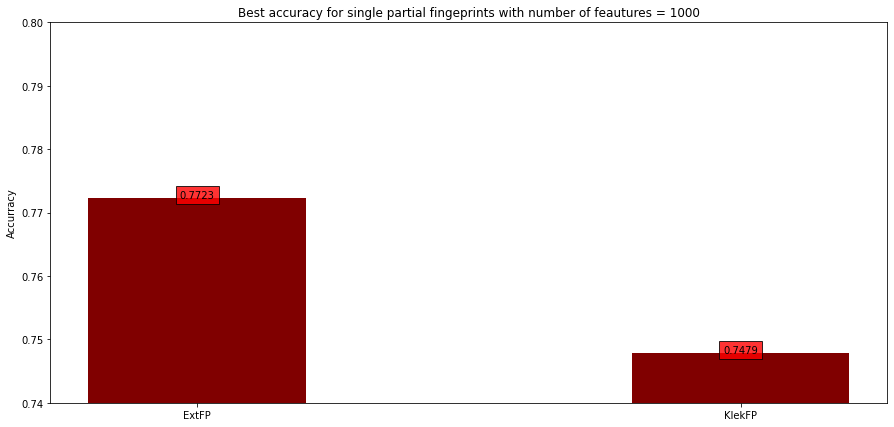

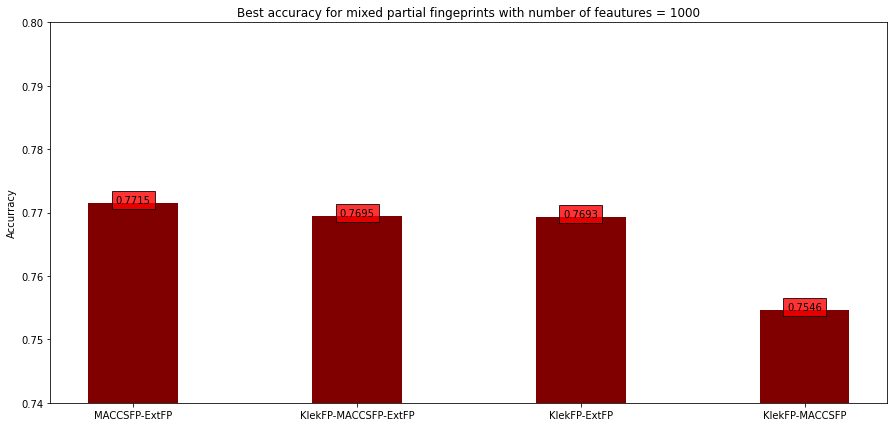

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\ExtFP[1500].csv because the file does not exists


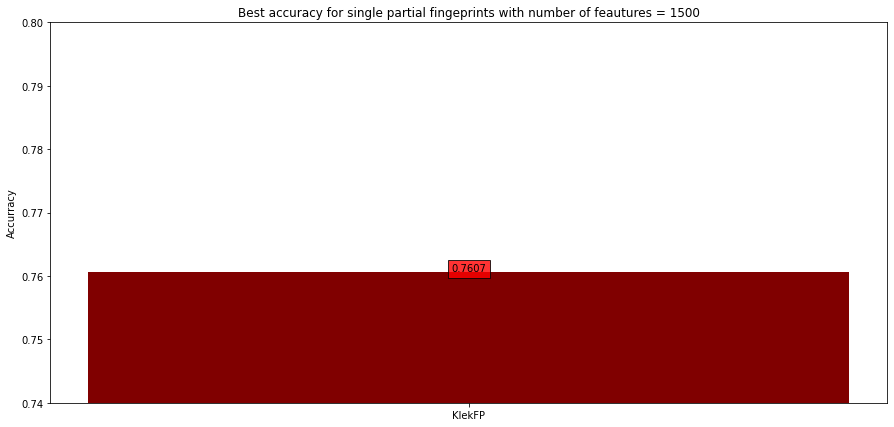

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP-ExtFP[1500].csv because the file does not exists


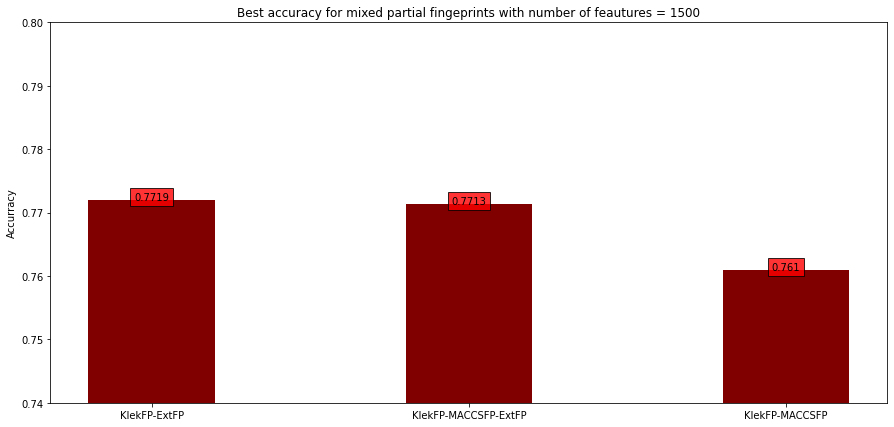

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP[2000].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\ExtFP[2000].csv because the file does not exists


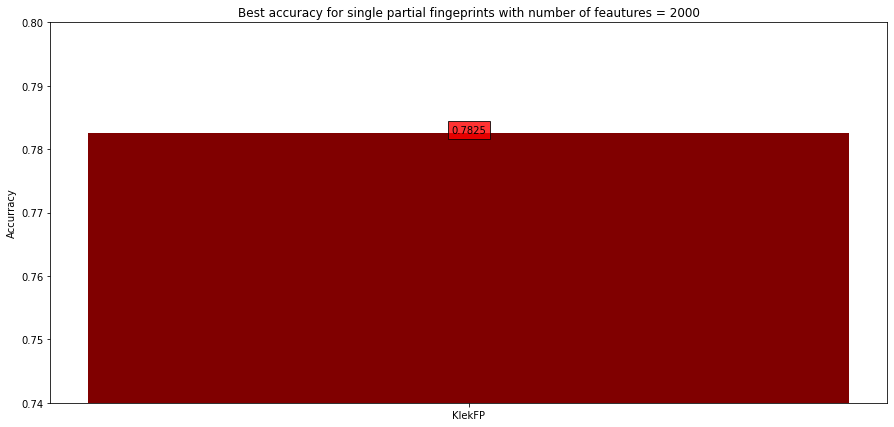

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP-ExtFP[2000].csv because the file does not exists


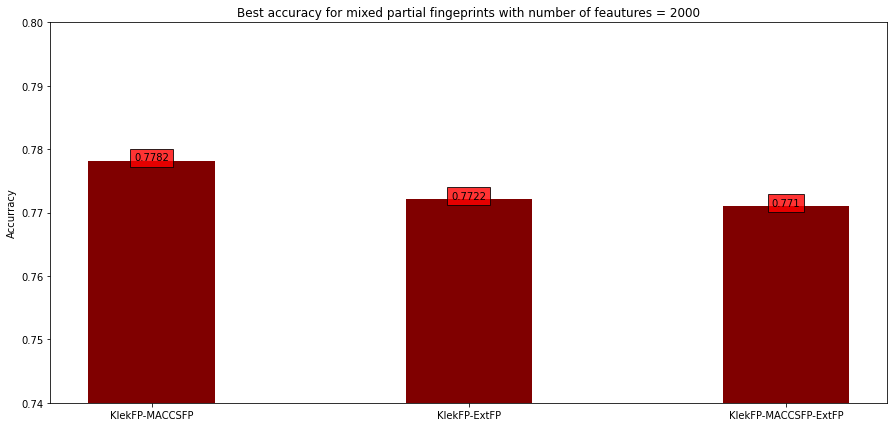

In [12]:
data_to_process = [
    ([RESULTS_KLEKOTA_ROTH_X, RESULTS_MACCS_X, RESULTS_EXT_X], VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_X, "single partial fingeprints with number of feautures = {}"),
    ([RESULTS_KLEKOTA_ROTH__MACCS_DATA_X, RESULTS_KLEKOTA_ROTH__EXT_DATA_X, RESULTS_MACCS__EXT_DATA_X, RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA_X], VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_X, "mixed partial fingeprints with number of feautures = {}"),
]

data_visualizer = DataVisualizer()

for x in range(500, 2500, 500):
    for data in data_to_process:
        input_paths = []
        for input_path in data[0]:
            input_paths.append(Path(str(input_path).format(x, x)))
            
        output_path = Path(str(data[1]).format(x))
        plot_title = data[2].format(x)
        
        data_visualizer.apply_for_multiple_files(input_paths, output_path, plot_title)

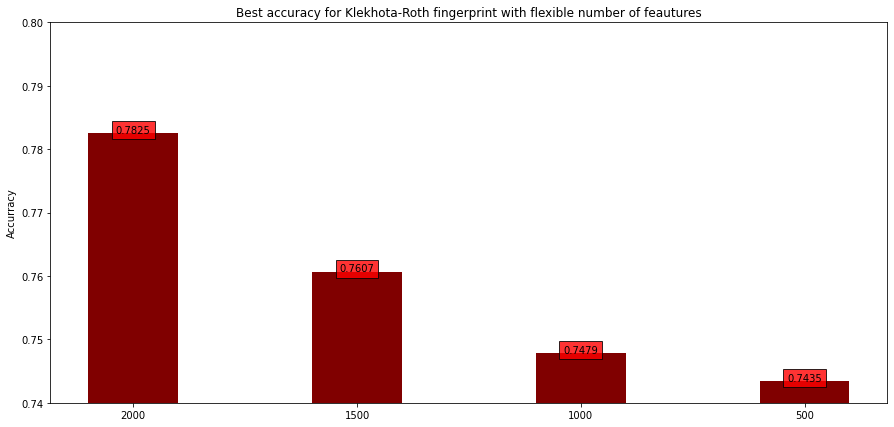

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\500\MACCSFP[500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\ExtFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\ExtFP[2000].csv because the file does not exists


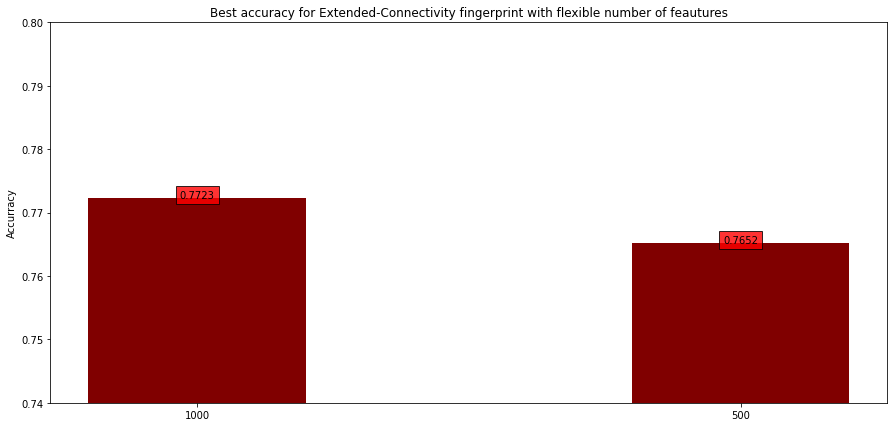

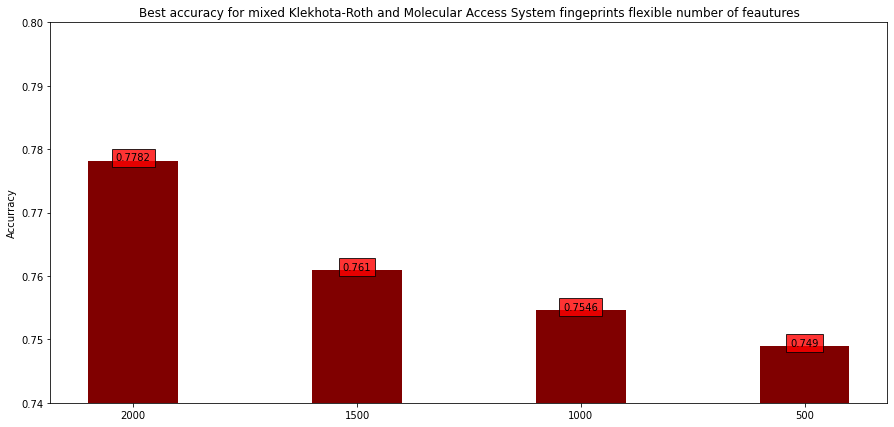

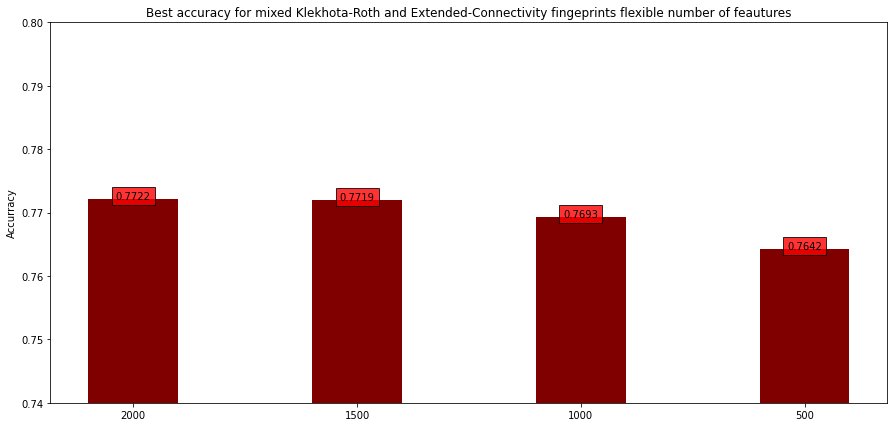

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP-ExtFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP-ExtFP[2000].csv because the file does not exists


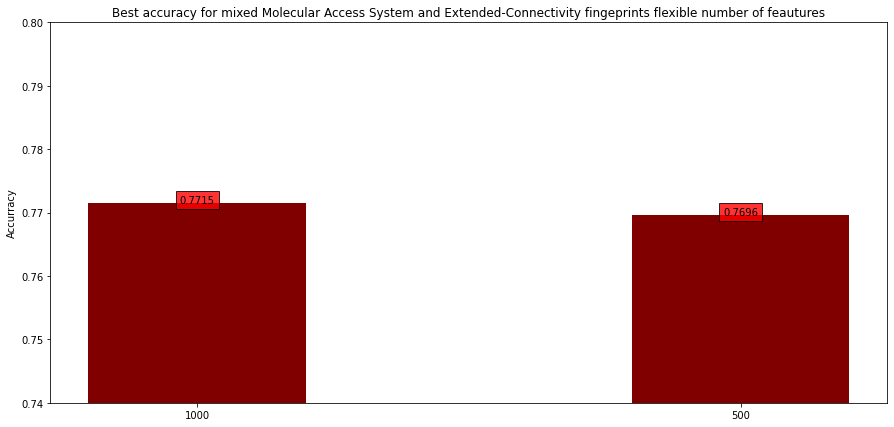

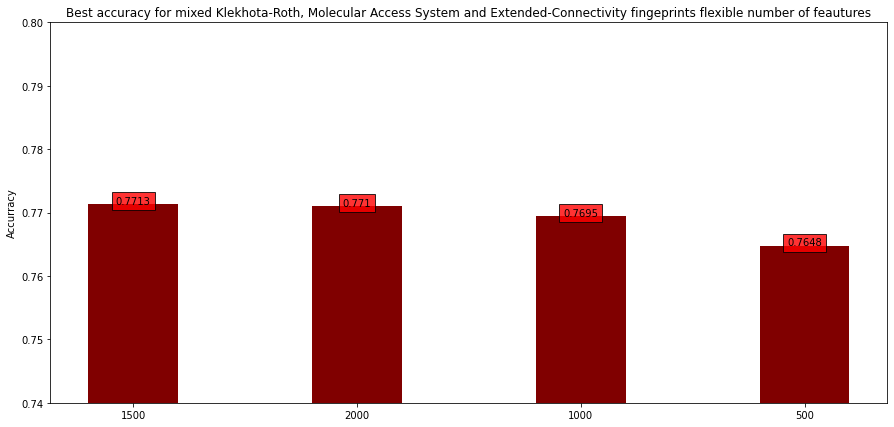

In [13]:
data_to_process = [
    (RESULTS_KLEKOTA_ROTH_X, VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_KLEKFP, "Klekhota-Roth fingerprint with flexible number of feautures"),
    (RESULTS_MACCS_X, VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_MACCSFP, "Molecular Access System fingerprint with flexible number of feautures"),
    (RESULTS_EXT_X, VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS_EXTFP, "Extended-Connectivity fingerprint with flexible number of feautures"),
    (RESULTS_KLEKOTA_ROTH__MACCS_DATA_X, VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_KLEKOTA_ROTH__MACCS, "mixed Klekhota-Roth and Molecular Access System fingeprints flexible number of feautures"),
    (RESULTS_KLEKOTA_ROTH__EXT_DATA_X, VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_KLEKOTA_ROTH__EXT, "mixed Klekhota-Roth and Extended-Connectivity fingeprints flexible number of feautures"),
    (RESULTS_MACCS__EXT_DATA_X, VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_MACCS__EXT, "mixed Molecular Access System and Extended-Connectivity fingeprints flexible number of feautures"),
    (RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA_X, VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS_KLEKOTA_ROTH__MACCS__EXT, "mixed Klekhota-Roth, Molecular Access System and Extended-Connectivity fingeprints flexible number of feautures")
]

data_visualizer = DataVisualizer()

for data in data_to_process:
    input_paths = []
    for x in range(500, 2500, 500):
        input_paths.append(Path(str(data[0]).format(x, x)))
            
    output_path = Path(str(data[1]))
    plot_title = data[2]
    
    data_visualizer.apply_for_multiple_files(input_paths, output_path, plot_title, "number_of_feautures")

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\500\MACCSFP[500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1000\MACCSFP[1000].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP[2000].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\ExtFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\ExtFP[2000].csv because the file does not exists


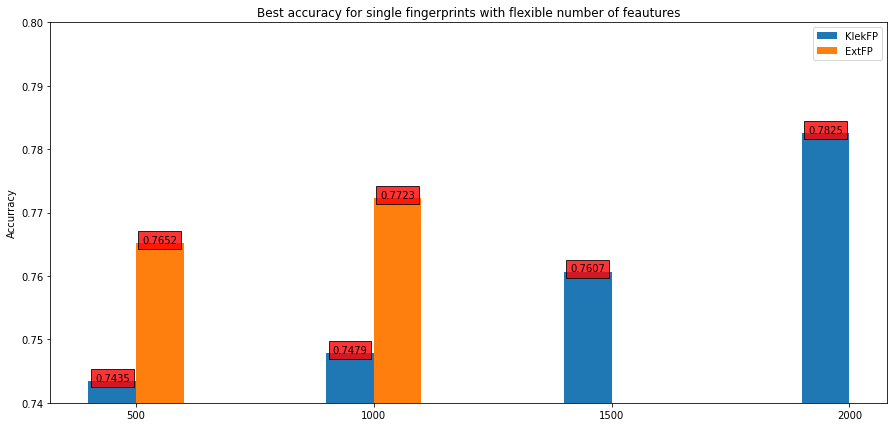

Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\1500\MACCSFP-ExtFP[1500].csv because the file does not exists
Ignoring C:\Users\SG0306249\Downloads\cardiotoxicity_prediction-main\cardiotoxicity_prediction-main\results\2000\MACCSFP-ExtFP[2000].csv because the file does not exists


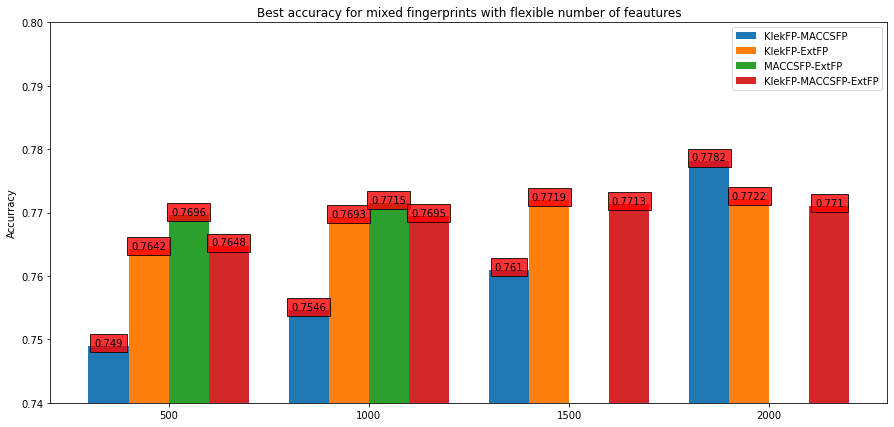

In [34]:
data_to_process = [
    ([RESULTS_KLEKOTA_ROTH_X, RESULTS_MACCS_X, RESULTS_EXT_X], VISUALIZATION_SINGLE_PARTIAL_FINGERPRINTS, "single fingerprints with flexible number of feautures"),
    ([RESULTS_KLEKOTA_ROTH__MACCS_DATA_X, RESULTS_KLEKOTA_ROTH__EXT_DATA_X, RESULTS_MACCS__EXT_DATA_X, RESULTS_KLEKOTA_ROTH__MACCS__EXT_DATA_X], VISUALIZATION_MIXED_PARTIAL_FINGERPRINTS, "mixed fingerprints with flexible number of feautures"),
]

data_visualizer = DataVisualizer()

for data in data_to_process:
    input_paths = []
    for input_path in data[0]:
        for x in range(500, 2500, 500):
            input_paths.append(Path(str(input_path).format(x, x)))
            
    output_path = Path(str(data[1]))
    plot_title = data[2]
    
    data_visualizer.apply_for_multiple_bar_plots(input_paths, output_path, plot_title, "number_of_feautures")

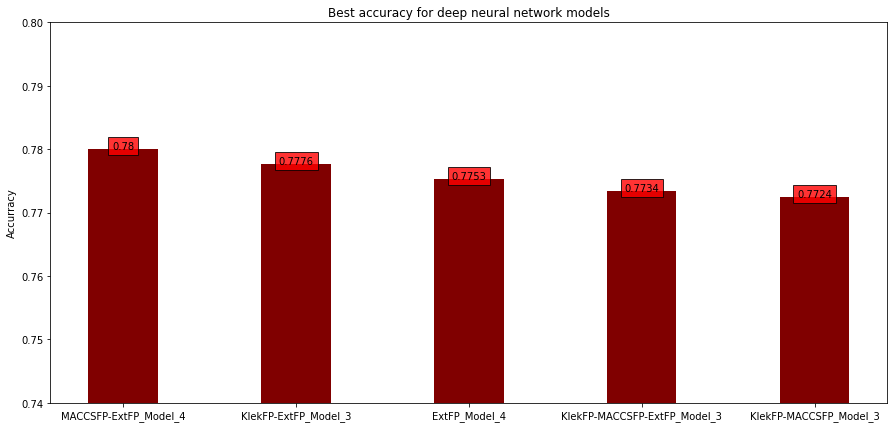

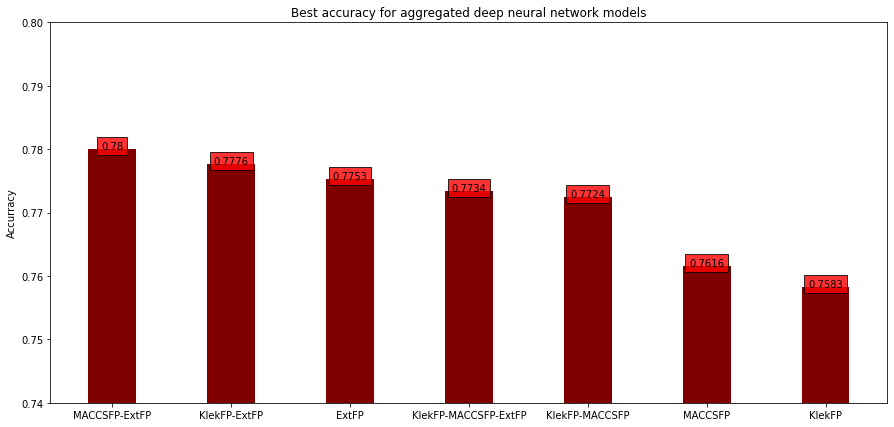

In [15]:
data_to_process = [
    (RESULTS_DEEP_NEURAL_NETWORKS, VISUALIZATION_DEEP_NEURAL_NETWORKS, VISUALIZATION_DEEP_NEURAL_NETWORKS_AGGREGATED)
]

data_visualizer = DataVisualizer()

for data in data_to_process:
    data_visualizer.apply_for_deep_neural_networks(data[0], data[1], data[2])